# 4.7 Deriving new variables

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os

In [3]:
# Define path
path = r'C:\Users\ale_o\OneDrive\Escritorio\Data Analytics\5. Python\Instacart Basket Analysis 01 - 2023 final'

In [22]:
# Importing orders_products_merged.pkl and department

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))
department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'departments_wrangled.csv'))

In [23]:
department.head(5)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both


### If - statement functions

In [6]:
df = ords_prods_merge[:1000000]

In [7]:

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [34]:
df['price_range'] = df.apply(price_label, axis=1)

In [35]:
df['price_range'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [36]:
df['prices'].max()

14.8

#### Analyzing information by department and range price product

In [37]:
department

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# Mapping the department id in ords_prods with department name from dept table
department_map= dict(zip(department['Unnamed: 0'], department['department']))
department

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [39]:
ords_prods_merge['department'] = ords_prods_merge['department_id'].map(department_map)

In [40]:
ords_prods_merge.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,department
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,beverages
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
5,3367565,1,6,2,7,19.0,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
7,3108588,1,8,1,14,14.0,196.0,2.0,1.0,Soda,77,7,9.0,both,beverages
8,2295261,1,9,1,16,0.0,196.0,4.0,1.0,Soda,77,7,9.0,both,beverages
9,2550362,1,10,4,8,30.0,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages


### If -statement loc

In [41]:
# if statement - subset
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [42]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [43]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [44]:
df['price_range_loc'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range_loc, dtype: int64

In [45]:
# if statemnet - all dataframe
ords_prods_merge.loc[ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [46]:
ords_prods_merge.loc[(ords_prods_merge['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [47]:
ords_prods_merge.loc[ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [48]:
ords_prods_merge['price_range_loc'].value_counts(dropna = False)

NaN                   21104410
Low-range product     10126321
Mid-range product       756450
High-range product      417678
Name: price_range_loc, dtype: int64

In [49]:
bar_price_range = ords_prods_merge['price_range_loc'].value_counts().plot.bar

### Analyzing bar_price_range by department 

In [51]:
crosstab_depart_cat_price = pd.crosstab(ords_prods_merge ['department'], ords_prods_merge ['price_range_loc'])
crosstab_depart_cat_price

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,35243,0
babies,0,125317,0
bakery,0,287938,0
beverages,0,852974,44710
breakfast,0,219333,0
bulk,0,1221,0
canned goods,0,298683,0
dairy eggs,5127,1431016,35369
deli,0,313628,98671


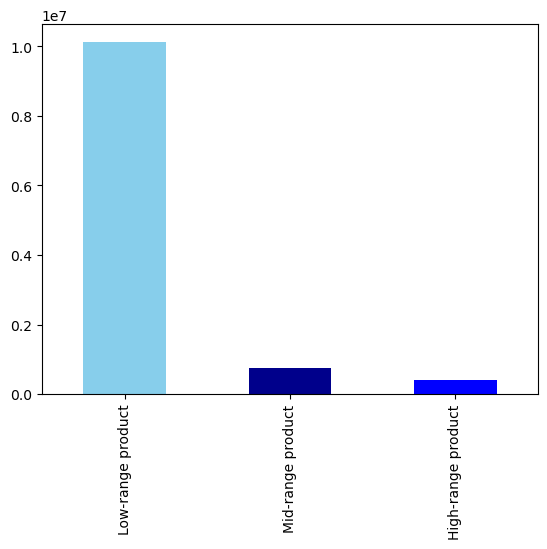

In [54]:
bar_depart_cat_price = ords_prods_merge['price_range_loc'].value_counts().plot.bar(color=['skyblue', 'darkblue', 'blue'])

### If - statement for loops

In [21]:
ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [73]:
result = []

In [79]:
for value in ords_prods_merge["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [80]:
ords_prods_merge['busiest_day'] = result

In [81]:
ords_prods_merge['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

In [82]:
ords_prods_merge.shape

(32404859, 16)

## Task

#### 2. Create a new label for the busiest 2 days and two slowest days

In [88]:
ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [89]:
ords_prods_merge['orders_day_of_week'].dtype

dtype('int64')

In [91]:
# Identify the busiest days 

result_2 = [] 

for value in ords_prods_merge["orders_day_of_week"]: 
    if value == 0 or value == 1: 
        result_2.append ("Busiest days")
    elif value == 4 or value == 3: 
        result_2.append ("Slowest days")
    else: 
        result_2.append("Regularly busy")

#### 3. Check the values of this column for accuracy

In [92]:
result_2

['Regularly busy',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Slowest days',
 'Regularly busy',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Slowest days',
 'Slowest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest 

In [93]:
ords_prods_merge['busiest_days'] = result_2

In [94]:
ords_prods_merge['busiest_days'].value_counts(dropna = False)

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

In [96]:
ords_prods_merge.shape

(32404859, 17)

#### 4. Busiest hours of the day

In [99]:
# Identify busiest hours during the day
busiest_hours_list = ords_prods_merge ['order_hour_of_day'].value_counts().rename_axis('hour').reset_index(name = 'busiest_hours_1')

In [100]:
busiest_hours_list


,hour,busiest_hours_1
0,10,2761760
1,11,2736140
2,14,2689136
3,15,2662144
4,13,2660954
5,12,2618532
6,16,2535202
7,9,2454203
8,17,2087654
9,8,1718118


In [102]:
# Identify frequency groups
groups_percentile = list(ords_prods_merge['order_hour_of_day'].quantile([0.75, 0.50, 0.25]))

In [103]:
groups_percentile

[16.0, 13.0, 10.0]

In [104]:
# Set the parameters for the identifying the frequency of orders per day
result_hours = []
for value2 in ords_prods_merge ['order_hour_of_day']:

            if value2 >= groups_percentile [0]:
                result_hours.append ('Most orders')
            elif value2 <= groups_percentile [2]:
                result_hours.append ('Fewer orders')
            else: 
                result_hours.append ('Average orders')


In [105]:
ords_prods_merge['busiest_period_of_day'] = result_hours

In [106]:
ords_prods_merge['busiest_period_of_day'].value_counts(dropna = False)

Average orders    13366906
Most orders       10325997
Fewer orders       8711956
Name: busiest_period_of_day, dtype: int64

In [107]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewer orders
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Fewer orders
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewer orders
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders


In [109]:
# Export datafram in pickle format
ords_prods_merge.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_merged_new_columns.pkl'))